# Mean Variance Optimization

- Import data and annualize the mea of monthly returns as well as the volatility of monthly returns with a scaling of $\sqrt(12)$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib as mpl
import seaborn as sns
import scipy as scs
import math

In [3]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [17]:
file_path = "C:/Users/dcste/OneDrive/Portfolio_Theory/multi_asset_etf_data.xlsx"
description = pd.read_excel(file_path,sheet_name = "descriptions")
description

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,101107853,358229114880,The Trust seeks to achieve its investment obje...
1,EFA,iShares MSCI EAFE ETF,ETF,USD,33352872,43798241280,The fund generally will invest at least 80% of...
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,47539498,25870192640,The fund generally will invest at least 80% of...
3,PSP,Invesco Global Listed Private E,ETF,USD,120371,171932880,The fund generally will invest at least 90% of...
4,QAI,IQ Hedge MultiIQ Hedge Multi-St,ETF,USD,138713,707315584,"The fund is a ""fund of funds"" which means it i..."
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,48935762,12276870144,The underlying index is a rules-based index co...
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,2314311,3708376064,The fund pursues its investment objective by i...
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,12097258,4077254400,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7992450,23017226240,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,369873,809217792,"The fund generally invests substantially all, ..."


In [42]:
excess_rt = pd.read_excel(file_path, sheet_name = "excess returns")
excess_rt = excess_rt.set_index("Date")



In [77]:
excess_rt.columns = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"]
excess_rt

,International Treasury ETF,Commodity Index,Emerging,MSCI EAFE,High Yield Index,7-10 Year Treasury Bond,U.S. Real Estate,Private Equity,MultiStrat HedgeFund,SPY,TIPS
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155028,0.114636,0.137906,-0.028006,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163134,0.159872,0.132390,0.029027,-0.020301,0.023199,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014649,0.032917,-0.006171,-0.025462,0.044850,-0.004035,-0.001254,0.001383
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069218,0.008344,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131503,0.032977,-0.004586,0.036504,0.007977
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.069406,0.056699,-0.061061,-0.067101,-0.041513,-0.041992,-0.041014,-0.125389,-0.033108,-0.087479,-0.021540
2022-05-31,0.004797,0.045469,0.005472,0.019297,0.015637,0.005521,-0.045096,0.014422,-0.004688,0.001595,-0.010585
2022-06-30,-0.045689,-0.074247,-0.050823,-0.086913,-0.069745,-0.007881,-0.068158,-0.131723,-0.032928,-0.081707,-0.030402


## Question 1

1. Calculate and display the summary statistics of each asset's return.
2. Which assets have the best and worst sharpe ratios?

In [78]:
# Scaling excess monthly return to yearly return
annualized_mean = pd.DataFrame((excess_rt.mean()*12), columns = ["Annual Return"])
annualized_mean["Volatility"] = excess_rt.std()*np.sqrt(12)
annualized_mean["Sharpe Ratio"] = annualized_mean["Annual Return"]/annualized_mean["Volatility"]
annualized_mean

,Annual Return,Volatility,Sharpe Ratio
International Treasury ETF,0.000003,0.078307,0.000034
Commodity Index,0.034196,0.180663,0.189279
Emerging,0.067971,0.192071,0.353884
MSCI EAFE,0.076474,0.162298,0.471197
High Yield Index,0.066938,0.089701,0.746233
7-10 Year Treasury Bond,0.021182,0.059387,0.356685
U.S. Real Estate,0.145477,0.184744,0.787452
Private Equity,0.128622,0.221773,0.579971
MultiStrat HedgeFund,0.018212,0.049174,0.370346
SPY,0.145643,0.145260,1.002640


The best Sharpe Ratio is SPY with a value of 1.0026. The worst sharpe ratio is the International Treasury ETF.

## Question 2
a. Calculate the correlation matrix of the returns. Which pair has the highest and lowest correlation?

b. How well have TIPs done in the sample? Hve they outperformed domestic or foreign bonds?

c. Based on the data, do TIPs seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

<AxesSubplot:>

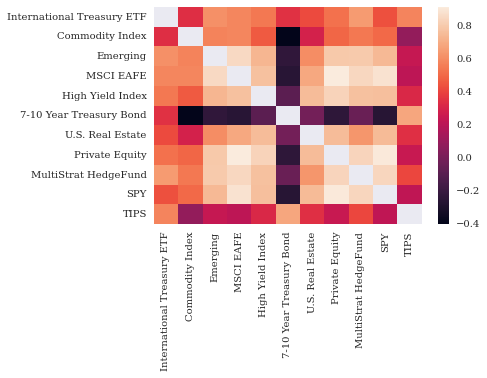

In [79]:
corr_mat = excess_rt.corr()
corr_mat[corr_mat == 1] = None
sns.heatmap(corr_mat)



In [80]:
corr_rank = pd.DataFrame(corr_mat.unstack().sort_values().dropna(), columns = ["Correlation"])
corr_rank

Correlation
7-10 Year Treasury Bond Commodity Index            -0.404870
Commodity Index         7-10 Year Treasury Bond    -0.404870
SPY                     7-10 Year Treasury Bond    -0.268692
7-10 Year Treasury Bond SPY                        -0.268692
MSCI EAFE               7-10 Year Treasury Bond    -0.264574
...                                                      ...
                        SPY                         0.874707
Private Equity          SPY                         0.903986
SPY                     Private Equity              0.903986
Private Equity          MSCI EAFE                   0.909274
MSCI EAFE               Private Equity              0.909274

[110 rows x 1 columns]

1. As you can see the pair that has the higest correlation is MSCI EAFE and Private Equity being $0.909274$. The pair that has the smallest correlation is the 7-10 Year Treasury Bond and Commodity Index with a correlation of $-.404870$. 

<AxesSubplot:title={'center':'Value of $1 Invested'}, xlabel='Date'>

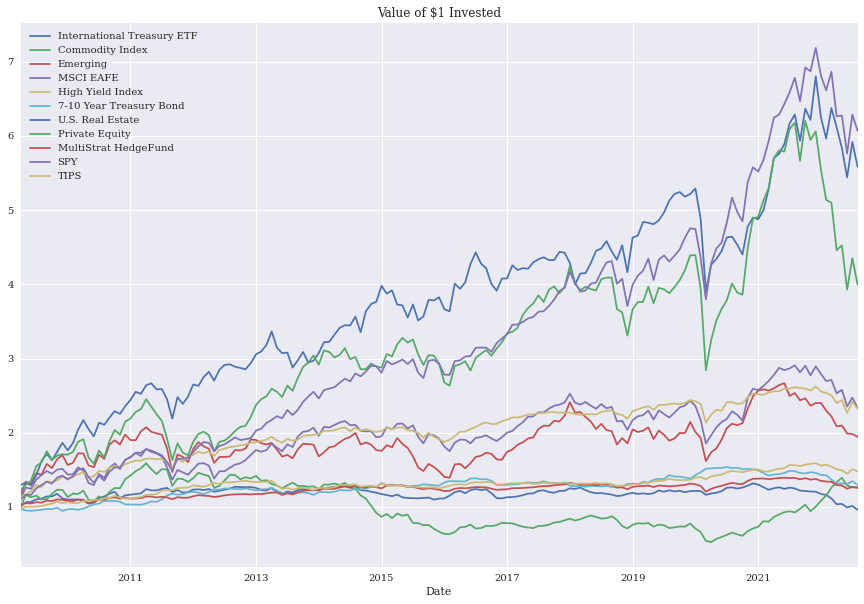

In [81]:

cum_returns = (excess_rt + 1).cumprod()
cum_returns.plot(figsize = (15,10), title = "Value of $1 Invested")

In [82]:
cum_returns.tail()

,International Treasury ETF,Commodity Index,Emerging,MSCI EAFE,High Yield Index,7-10 Year Treasury Bond,U.S. Real Estate,Private Equity,MultiStrat HedgeFund,SPY,TIPS
Date,,,,,,,,,,,
2022-04-30,1.035949,1.332069,2.085249,2.529414,2.400055,1.311337,6.113996,4.459873,1.294681,6.264481,1.508487
2022-05-31,1.040919,1.392637,2.096660,2.578223,2.437584,1.318578,5.838276,4.524192,1.288612,6.274471,1.492520
2022-06-30,0.993359,1.289238,1.990100,2.354142,2.267573,1.308186,5.440354,3.928250,1.246180,5.761801,1.447144
2022-07-31,1.012791,1.262452,1.981398,2.473748,2.417476,1.345774,5.917607,4.352815,1.268537,6.287311,1.508238
2022-08-31,0.959666,1.268570,1.945637,2.335070,2.322938,1.297569,5.585566,3.995492,1.256061,6.068957,1.478659



2. All in all *Treasury Inflation-Protected Securities* do not perform exceedingly well between 2010-2022, with an average excess return of around $3%$. However, this does not mean it shouldn't be included in a portfolio.  TIPs do outperform domestic bonds over this investment horizon and they also outperform International Treasury Bonds. 

3. Based on the data, **TIPS** definitely expand the investment opportunity offering any portfolio a better risk-return profile. The reason why TIPS expand the investment opportunity set because traditional fixed income assets respond to unanticipated inflation with a declining price (because the **ytm increases**). In contrast, inflation indexed bonds respond to unancipated inflation with an increasing price since the principal is increases in proportion to inflation. When two assets respond in an opposite fashion to an important variable , it is important to categorize them in separate asset classes. 


- Yes, *Harvard* should consider **Treasury Inflation-Protected Securities as a separate asset class.**


## Question 3
1. Compute and display the weights of the tangency portfolios: $w^t$
2. Compute the mean, volatility, and sharpe ratio for the tangency portfolio corresponding to $w^t$.

In [90]:
# Determining Covariance Matrix



In [93]:
def compute_tangency(df_tilde, diagonalize_Sigma=False):
    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))



    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.

    omega_tangency = pd.Series(weights, index=mu_tilde.index)

    return omega_tangency, mu_tilde, Sigma_adj


omega_tangency, mu_tilde, Sigma = compute_tangency(excess_rt)

omega_tangency.to_frame('Tangency Weights')

,Tangency Weights
International Treasury ETF,-2.521104
Commodity Index,0.468378
Emerging,0.744506
MSCI EAFE,-0.267319
High Yield Index,2.007920
7-10 Year Treasury Bond,4.799263
U.S. Real Estate,-0.600881
Private Equity,-0.912219
MultiStrat HedgeFund,-8.823273
SPY,4.894721


In [94]:
def portfolio_stats(omega, mu_tilde, Sigma, annualize_fac):
    # Mean
    mean = (mu_tilde @ omega) * annualize_fac

    # Volatility
    vol = np.sqrt(omega @ Sigma @ omega) * np.sqrt(annualize_fac)


    # Sharpe ratio
    sharpe_ratio = mean / vol

    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
                              index = ['Mean', 'Volatility', 'Sharpe'], 
                              columns = ['Portfolio Stats']), 4)

portfolio_stats(omega_tangency, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.6664
Volatility,0.3454
Sharpe,1.9291


In [95]:
def target_mv_portfolio(df_tilde, target_return=0.01, diagonalize_Sigma=False):
 omega_tangency, mu_tilde, Sigma = compute_tangency(df_tilde, diagonalize_Sigma=diagonalize_Sigma)

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    Sigma_inv = np.linalg.inv(Sigma_adj)

    N = Sigma_adj.shape[0]

    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu_tilde)/(mu_tilde @ Sigma_inv @ mu_tilde)) * target_return

    omega_star = delta_tilde * omega_tangency

    return omega_star, mu_tilde, Sigma_adj

omega_star, mu_tilde, Sigma = target_mv_portfolio(df_ex)

omega_star_df = omega_star.to_frame('MV Portfolio Weights')

omega_star_df

IndentationError: unexpected indent (3823669943.py, line 4)